In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [3]:
train = pd.read_csv('/Users/prakrutikothari/Downloads/Train.csv')
valid= pd.read_csv('/Users/prakrutikothari/Downloads/Valid.csv')
test = pd.read_csv('/Users/prakrutikothari/Downloads/Test.csv')

In [4]:
train.shape

(40000, 2)

In [5]:
train['text']

0        I grew up (b. 1965) watching and loving the Th...
1        When I put this movie in my DVD player, and sa...
2        Why do people who do not know what a particula...
3        Even though I have great interest in Biblical ...
4        Im a die hard Dads Army fan and nothing will e...
                               ...                        
39995    "Western Union" is something of a forgotten cl...
39996    This movie is an incredible piece of work. It ...
39997    My wife and I watched this movie because we pl...
39998    When I first watched Flatliners, I was amazed....
39999    Why would this film be so good, but only gross...
Name: text, Length: 40000, dtype: object

In [6]:
train = train.convert_dtypes()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  string
 1   label   40000 non-null  Int64 
dtypes: Int64(1), string(1)
memory usage: 664.2 KB


In [7]:
train['label'].value_counts()

0    20019
1    19981
Name: label, dtype: Int64

In [8]:
train.loc[5,'text']

"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery."

In [18]:
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
custom_stop_words = ['br']
stop_words = set(stop_words + custom_stop_words)
lemmatize = WordNetLemmatizer()

def preprocessor(text):
    filter_sentence = list()
    stop_words = set(stopwords.words('english') + custom_stop_words)
    sentence = text
    sentence = re.sub(r'[^\w\s]','',sentence)
    tokenize = nltk.word_tokenize(sentence)
    words = [w for w in tokenize if not w in stop_words]
    for w in words:
        filter_sentence.append(PorterStemmer().stem(w))
    return " ".join(filter_sentence)
train['text']=train['text'].apply(preprocessor)

In [19]:
train_x = train['text']
valid_x = valid['text']
test_x = test['text']
train_y = train['label']
valid_y = valid['label']
test_y = test['label']

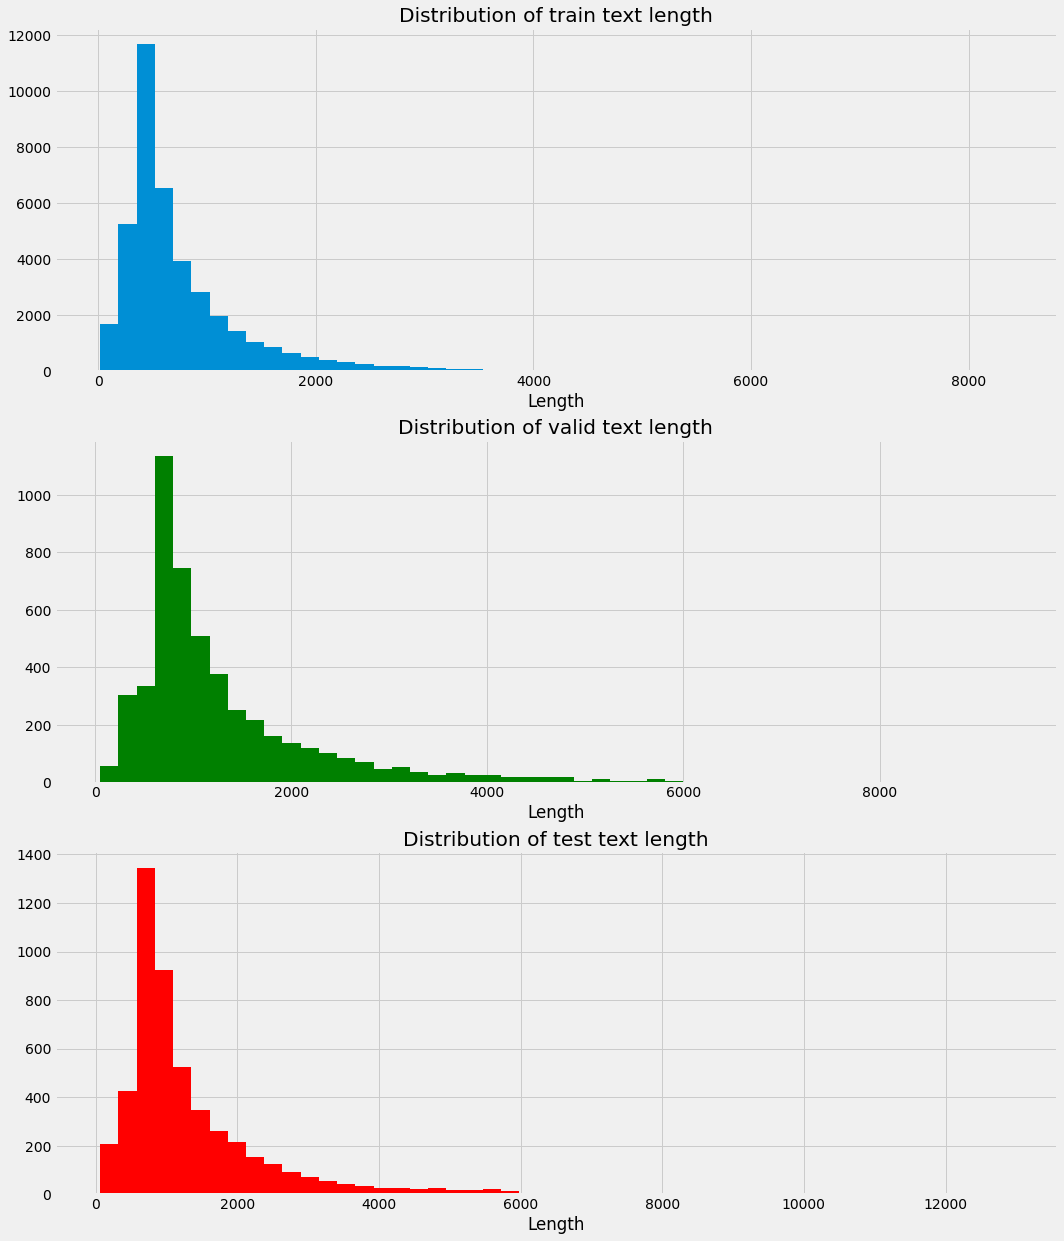

In [20]:
plt.figure(figsize=(16,20))
plt.style.use('fivethirtyeight')

plt.subplot(3,1,1)
train_len = [len(l) for l in train_x]
plt.hist(train_len,bins=50)
plt.title('Distribution of train text length')
plt.xlabel('Length')

plt.subplot(3,1,2)
valid_len = [len(l) for l in valid_x]
plt.hist(valid_len,bins=50,color='green')
plt.title('Distribution of valid text length')
plt.xlabel('Length')

plt.subplot(3,1,3)
test_len = [len(l) for l in test_x]
plt.hist(test_len,bins=50,color='red')
plt.title('Distribution of test text length')
plt.xlabel('Length')

plt.show()

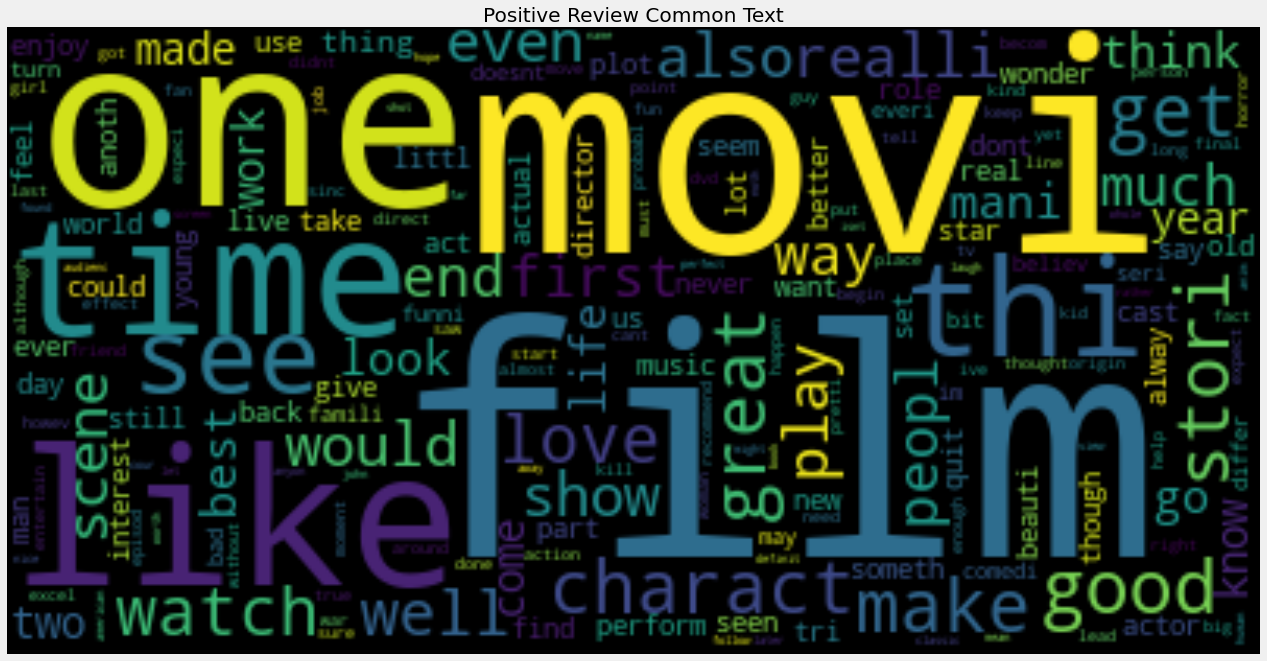

In [21]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

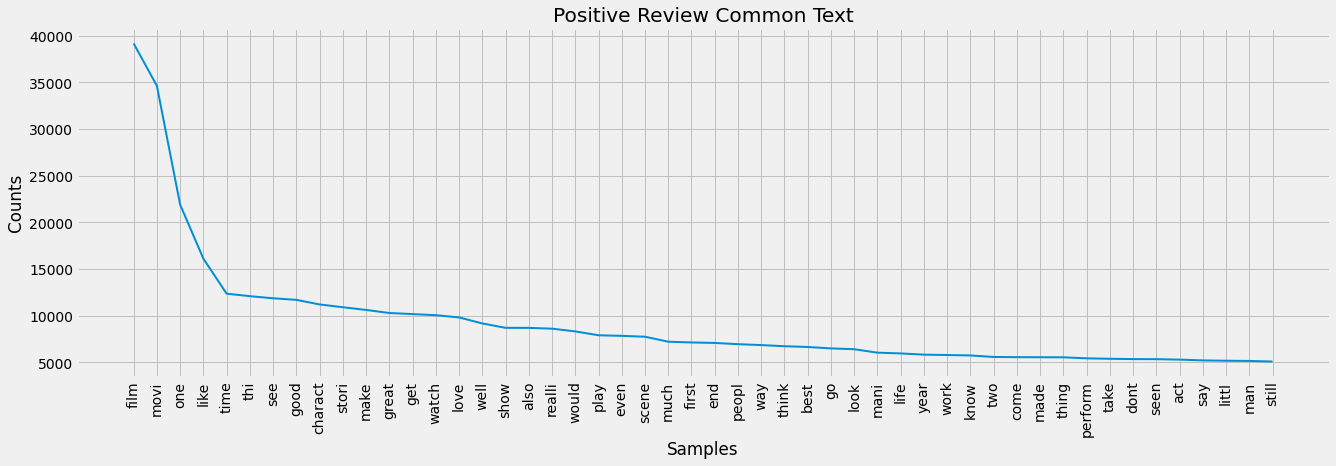

In [22]:
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

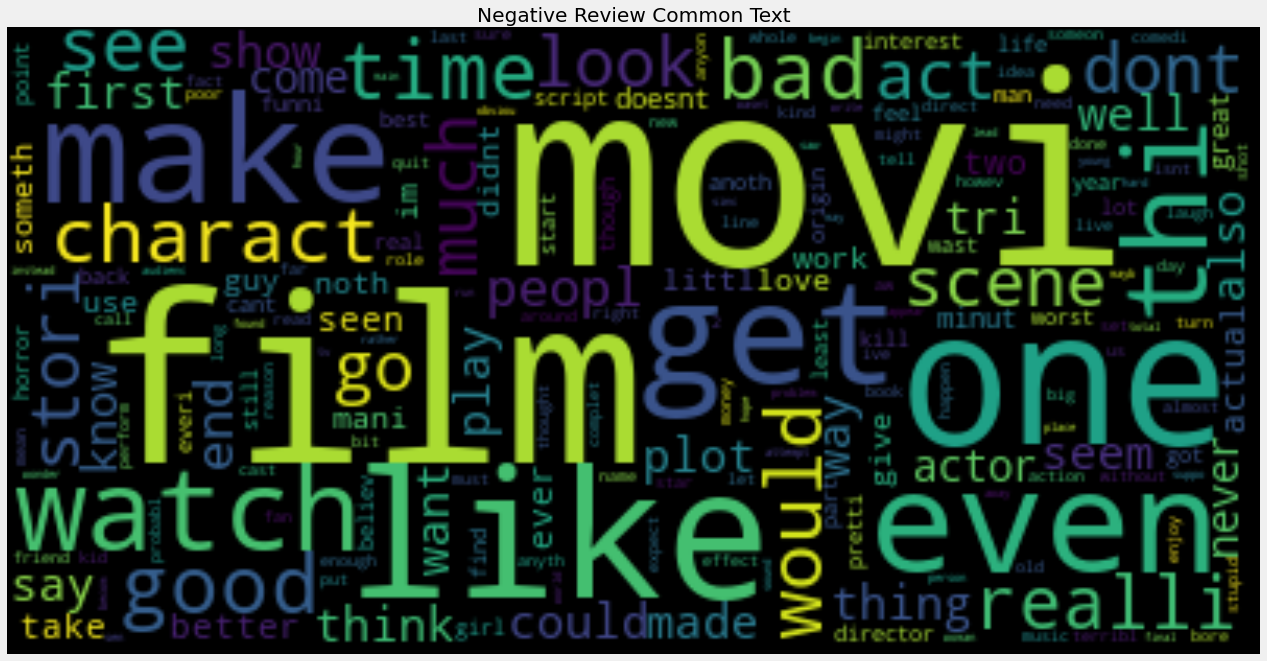

In [23]:
plt.figure(figsize=(20,20))
neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=neg_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Negative Review Common Text')
plt.axis('off')
plt.show()

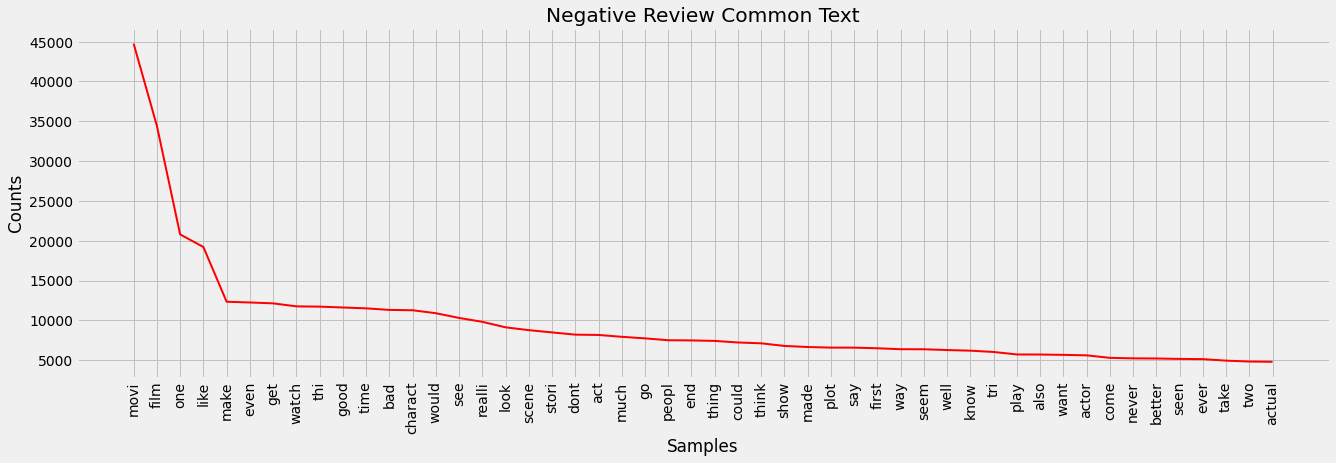

In [24]:
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = train['text']
y = train['label']
y=y.astype('int')
X = tfidf.fit_transform(X)
X

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3513545 stored elements in Compressed Sparse Row format>

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg=LogisticRegression().fit(X_train, y_train)

In [148]:
train_score=round(log_reg.score(X_train, y_train),2)*100
test_score=round(log_reg.score(X_test, y_test),2)*100
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3941
           1       0.88      0.88      0.88      4059

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [149]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.433125 0.0595  ]
 [0.06     0.447375]]


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(X_train, y_train)
Y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3941
           1       0.88      0.88      0.88      4059

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.73      3941
           1       0.72      0.80      0.76      4059

    accuracy                           0.75      8000
   macro avg       0.75      0.74      0.74      8000
weighted avg       0.75      0.75      0.74      8000

